### Author: Kylie Newcomer
##### [GitHub Repository](https://github.com/kylienewcomer/eds220-hwk4.git)

## About
### Purpose:
This project visualizes the aftermath and burn scars of the Palisades and Eaton fires that took place in early January 2025 with satellite images and geospatial data.

### Highlights:
- Work with and visualize raster data using `xarray` and `NetCDF` datasets
- Compare true color and false color images with satellite imagery by using different reflectance wavelengths
- Visualize raster and geographic data together to 


### About the data:
This notebook contains datasets with the perimeters of the Palisades and Eaton fires and reflectance satellite imagery of the Los Angeles area following the fires. The perimeter data comes from the ArcGIS hub. The other dataset comes from the Microsof Planetary Computer data catalogue and was collected by the Earth Resources Observation and Science (EROS) Center.

### References:
Earth Resources Observation and Science (EROS) Center. (2020). Landsat 8–9 Operational Land Imager / Thermal Infrared Sensor Level-2, Collection 2 [Dataset]. U.S. Geological Survey. https://doi.org/10.5066/P9OGBGM6 [Accessed Nov. 22 2025]

Los Angeles County Enterprise GIS. (2025). Palisades and Eaton Dissolved Fire Perimeters [Dataset]. Los Angeles County. https://egis-lacounty.hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about [Accessed Nov. 22 2025]


In [1]:
# Import packages
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import xarray as xr
import matplotlib.pyplot as plt

## Fire perimeter data exploration
Perimeter data for the Palisades and Eaton fires are imported and explored to determine the data types and possibilities for data visualization throughout this project

In [2]:
# Read in Palisades perimeter data
fp = os.path.join('data/Palisades_perm_20250121/Palisades_Perimeter_20250121.shp')
pal_perm = gpd.read_file(fp)

# Read in Eaton perimeter data
fp = os.path.join('data/Eaton_perm_20250121/Eaton_Perimeter_20250121.shp')
eat_perm = gpd.read_file(fp)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


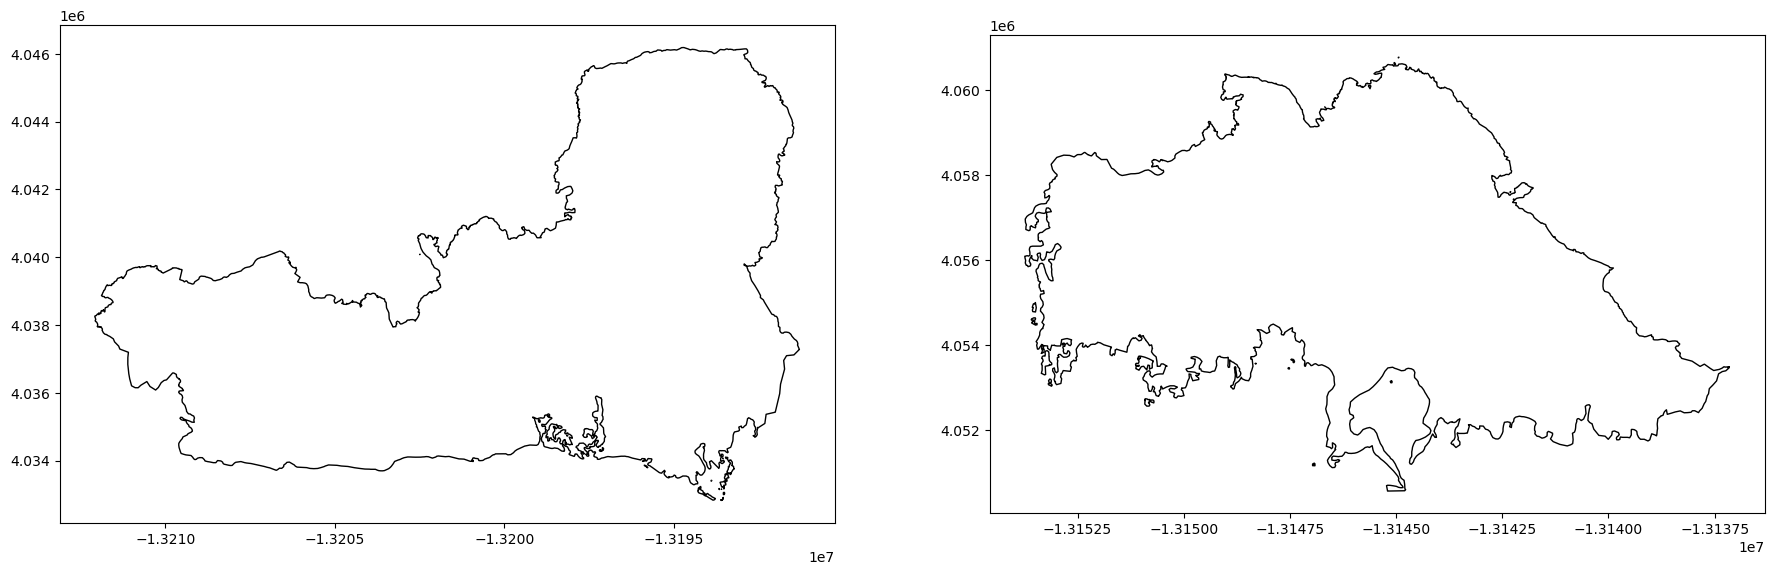

In [3]:
# Visualize perimeter data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
pal_perm.plot(ax = ax1, edgecolor = "black", color = "none")
eat_perm.plot(ax = ax2, edgecolor = "black", color = "none")
plt.show()

In [4]:
# Look at CRS of perimeter datasets
print('Palisades perimeter CRS:', pal_perm.crs)
print('Eaton perimeter CRS:', eat_perm.crs)

Palisades perimeter CRS: EPSG:3857
Eaton perimeter CRS: EPSG:3857


In [5]:
# Look at column types
print(pal_perm.dtypes)
print(eat_perm.dtypes)

# Check shape
print('The shape of the Palisades perimeter data is:', pal_perm.shape)
print('The shape of the Eaton perimeter data is:', eat_perm.shape)

OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object
OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object
The shape of the Palisades perimeter data is: (21, 5)
The shape of the Eaton perimeter data is: (20, 5)


The Palisades and Eaton perimeter fires are both projections with a CRS of EPSG:3857 with five columns including a geometry column. The Eaton perimeter has 20 rows, while the Palisades perimeter has 21 rows.

## NetCDF data import and exploration

NetCDF data is imported and explored to determine the ways it can be visualized and paired with the perimeter datasets.

In [6]:
# a.
# Read in landsat dataset
landsat = xr.open_dataset('data/landsat8-2025-02-23-palisades-eaton.nc')

In [7]:
landsat.head()

<xarray.Dataset> Size: 596B
Dimensions:      (y: 5, x: 5)
Coordinates:
  * y            (y) float64 40B 3.799e+06 3.799e+06 ... 3.799e+06 3.799e+06
  * x            (x) float64 40B 3.344e+05 3.344e+05 ... 3.345e+05 3.345e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 100B ...
    green        (y, x) float32 100B ...
    blue         (y, x) float32 100B ...
    nir08        (y, x) float32 100B ...
    swir22       (y, x) float32 100B ...
    spatial_ref  int64 8B ...

The `landsat` dataset is a (2742,1418) with 3 dimensions: x and y geographic dimensions and the third being time. The data has 6 variables, `red`, `green`, `blue`, `nir08`, `swir22`, `spatial_ref`, 5 of which measure different waves of light reflectance.

## Restoring geospatial information

a. Use rio.crs to print what is the CRS of this dataset. Is this a geospatial object?

b. You may have noticed on section 3 that the geospatial information for this dataset is stored in the variable spatial_ref. Print the CRS by using accesing the spatial_ref.crs_wkt attribute of the dataset.

c. Recover the geospatial information by using rio.write_crs() and the spatial reference information form part b.

d. Print the CRS of the updated dataset.

In [8]:
print(landsat.rio.crs)

None


The fire dataset is not a geospatial object.

In [9]:
# Use `spatial_ref.crs_wkt` to access spatial reference variable
landsat_crs = landsat.spatial_ref.crs_wkt

# Assign CRS as previously accessed spatial reference variable
landsat = landsat.rio.write_crs(landsat_crs)


print(f'The CRS of the landsat data is {landsat.rio.crs}')

The CRS of the landsat data is EPSG:32611


## True color image

Data will inital be plotted to visual band widths. The inital plot failed due to not specifying vmin and vmax for band wavelengths. After updjusting by including `robust` = True, the plot properly displayed a true color image of Los angeles. NA's were present in the data, so replacing NA's with 0 was able to account for things like cloud coverage. The false color image of Los Angeles displays burn scars and loss of vegetation.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


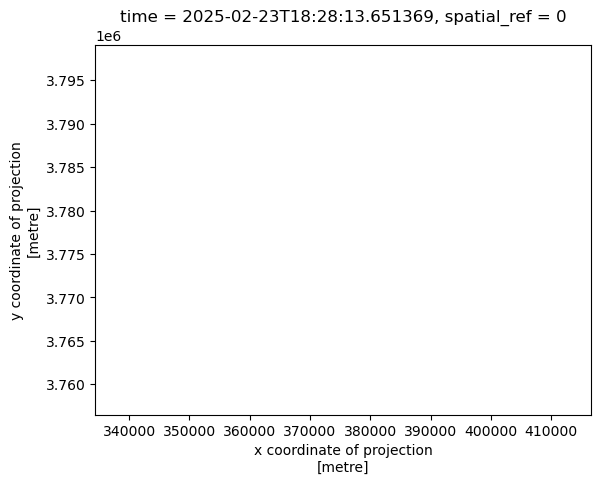

In [10]:
# a.
# Creating initial true color plot
landsat[["red", "green", "blue"]].to_array().plot.imshow()

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


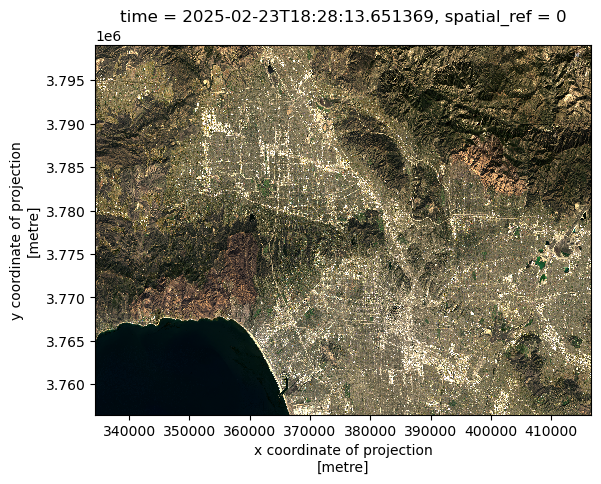

In [11]:
# b.
# Replot using `robust = True`
landsat[["red", "green", "blue"]].to_array().plot.imshow(robust = True)

In [12]:
# c.
# determine which bands contain NA's using for loop
for band in landsat.data_vars:
    print(band, landsat[band].isnull().any().item())

red False
green True
blue True
nir08 False
swir22 False


In [13]:
# d.
# Replace NA's
landsat = landsat.fillna(0)

In [14]:
# Test that there are no more NA's
assert (landsat[band].isnull().any().item() == False)

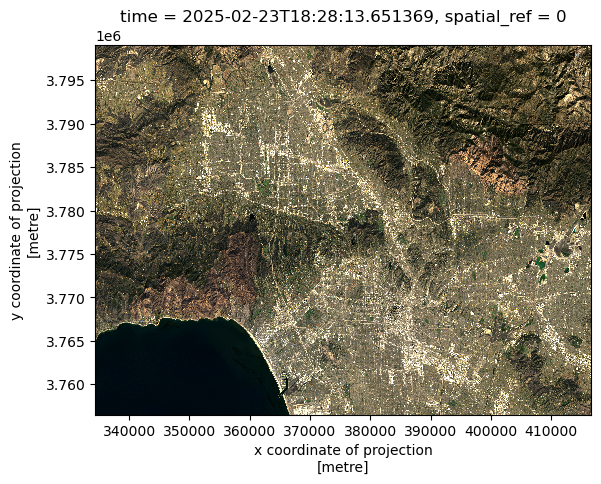

In [15]:
# e.
# Plot true color images with no NA's
(landsat[["red", "green", "blue"]]
 .to_array()
 .plot
 .imshow(robust = True))

f.
The inital plot in part a did not produce a map, because the limits vmin and vmax were not specified for the color limits. Using `robust = True` would automatically calculate vmin and vmax for the map. A plot was produced in part e that displays the Los Angeles area where the Eaton and Palisade fires took place.

## False color image

Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).


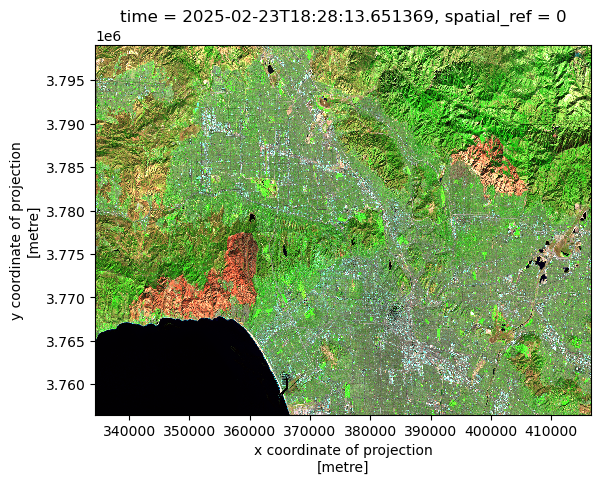

In [16]:
# Create false color image
landsat[[ "swir22", "nir08", "red"]].to_array().plot.imshow(robust = True)

## Map
A false colored image displaying inrafred and near infrared false color images with the fire perimeters is created. In this image there is a clear distinction of vegetation and other land coverage between places that did and did not experience fires.

In [17]:
# Need to fix CRS's of perimeters
pal_perm = pal_perm.to_crs(landsat_crs)
eat_perm = eat_perm.to_crs(landsat_crs)

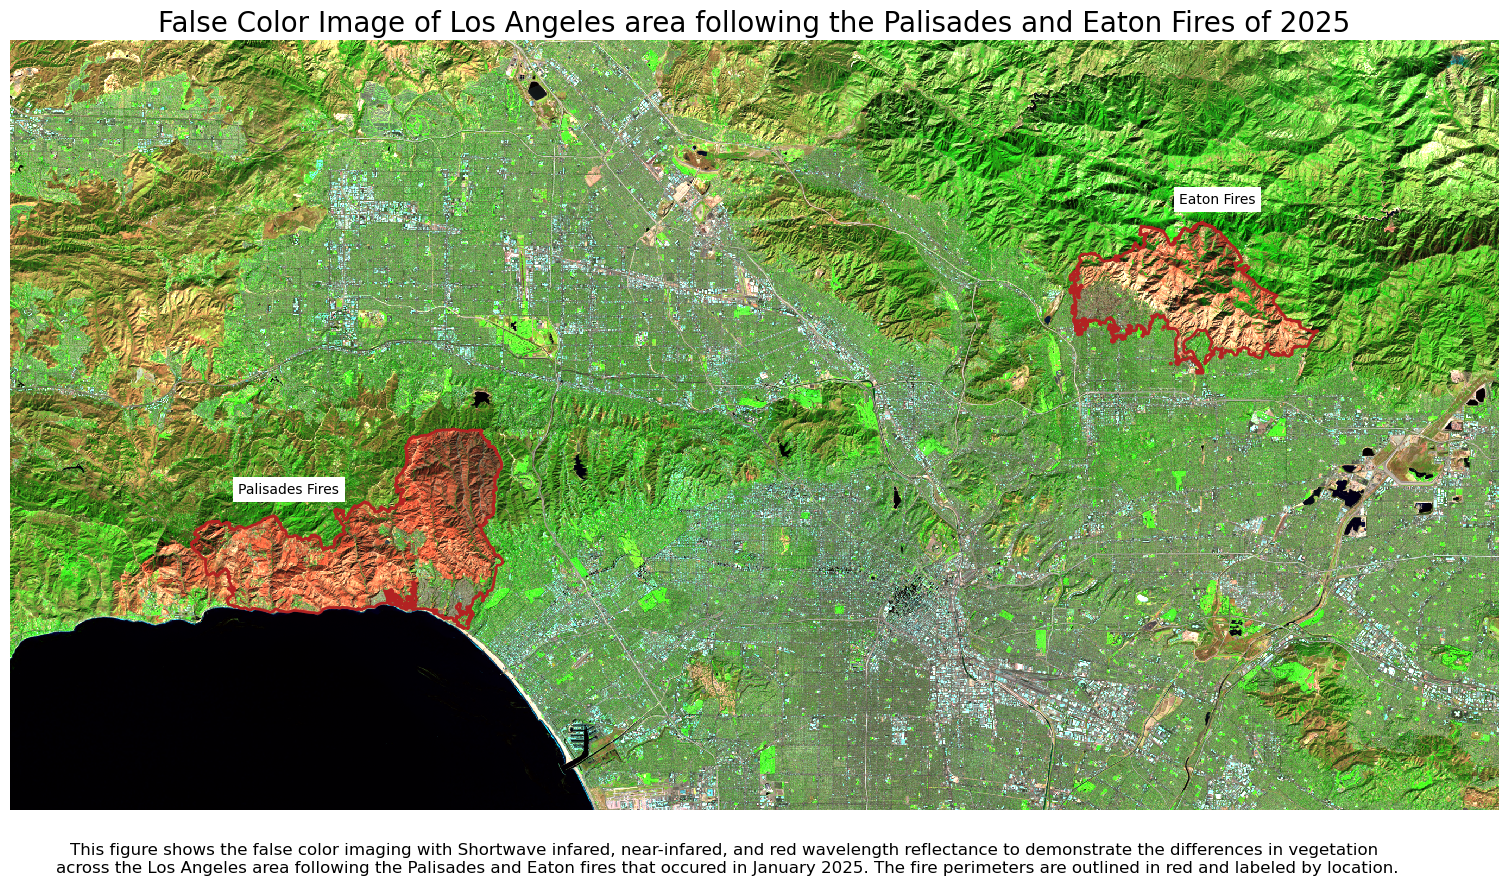

In [18]:
fig, (ax) = plt.subplots( figsize=(22, 10))

# Plot false color image
landsat[[ "swir22", "nir08", "red"]].to_array().plot.imshow(robust = True, ax=ax)
plt.title('False Color Image of Los Angeles area following the Palisades and Eaton Fires of 2025', size = 20)

# Plot Eaton and Palisades perimeters
eat_perm.plot(ax=ax, edgecolor = "firebrick", linewidth = 2, color = "none")
pal_perm.plot(ax=ax, edgecolor = "firebrick", linewidth = 2, color = "none")

# Make the aesthetically nicer
ax.axis('off')

# Add labels for fires
ax.text(x = 399000, y = 3790000, s = "Eaton Fires", color = "black", fontsize = 10).set_bbox(dict(facecolor='white', edgecolor = 'none'))
ax.text(x = 347000, y = 3774000, s = "Palisades Fires", color = "black", fontsize = 10).set_bbox(dict(facecolor='white', edgecolor = 'none'))

# Add a description of the figure
plt.figtext(s = "This figure shows the false color imaging with Shortwave infared, near-infared, and red wavelength reflectance to demonstrate the differences in vegetation \nacross the Los Angeles area following the Palisades and Eaton fires that occured in January 2025. The fire perimeters are outlined in red and labeled by location.",
            x = 0.5,
            y = 0.05,
            ha = 'center',
            size = 12,
            wrap = True)
    
plt.show()